In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Helper Functions

In [4]:
path = os.path.join(os.getcwd(), 'Training', 'sysdig_data')

In [20]:
def perc(pct):
    return ('%.1f' % pct) if pct > 1 else ''

In [25]:
def getPlot(title):
    files = list()

    for file in os.listdir(path):
        if file.endswith(".txt") and title in file:
            files.append(file)

    file = files[0]

    with open(os.path.join(path, file), 'r') as f:
        data = f.readlines()

    syscalls = dict()

    for e in data:
        entry = e.split()[1]
        if entry not in syscalls:
            syscalls[entry] = 0
        syscalls[entry] += 1

    df = pd.DataFrame(syscalls.items(), columns=['syscall', 'count'])
    fig = plt.figure(figsize=(10, 10))
    plt.pie(df['count'], labels = df['syscall'], autopct = perc, radius = 2, labeldistance = None)
    plt.legend(loc = "best", bbox_to_anchor = (1.05, 1))
    plt.show()
    

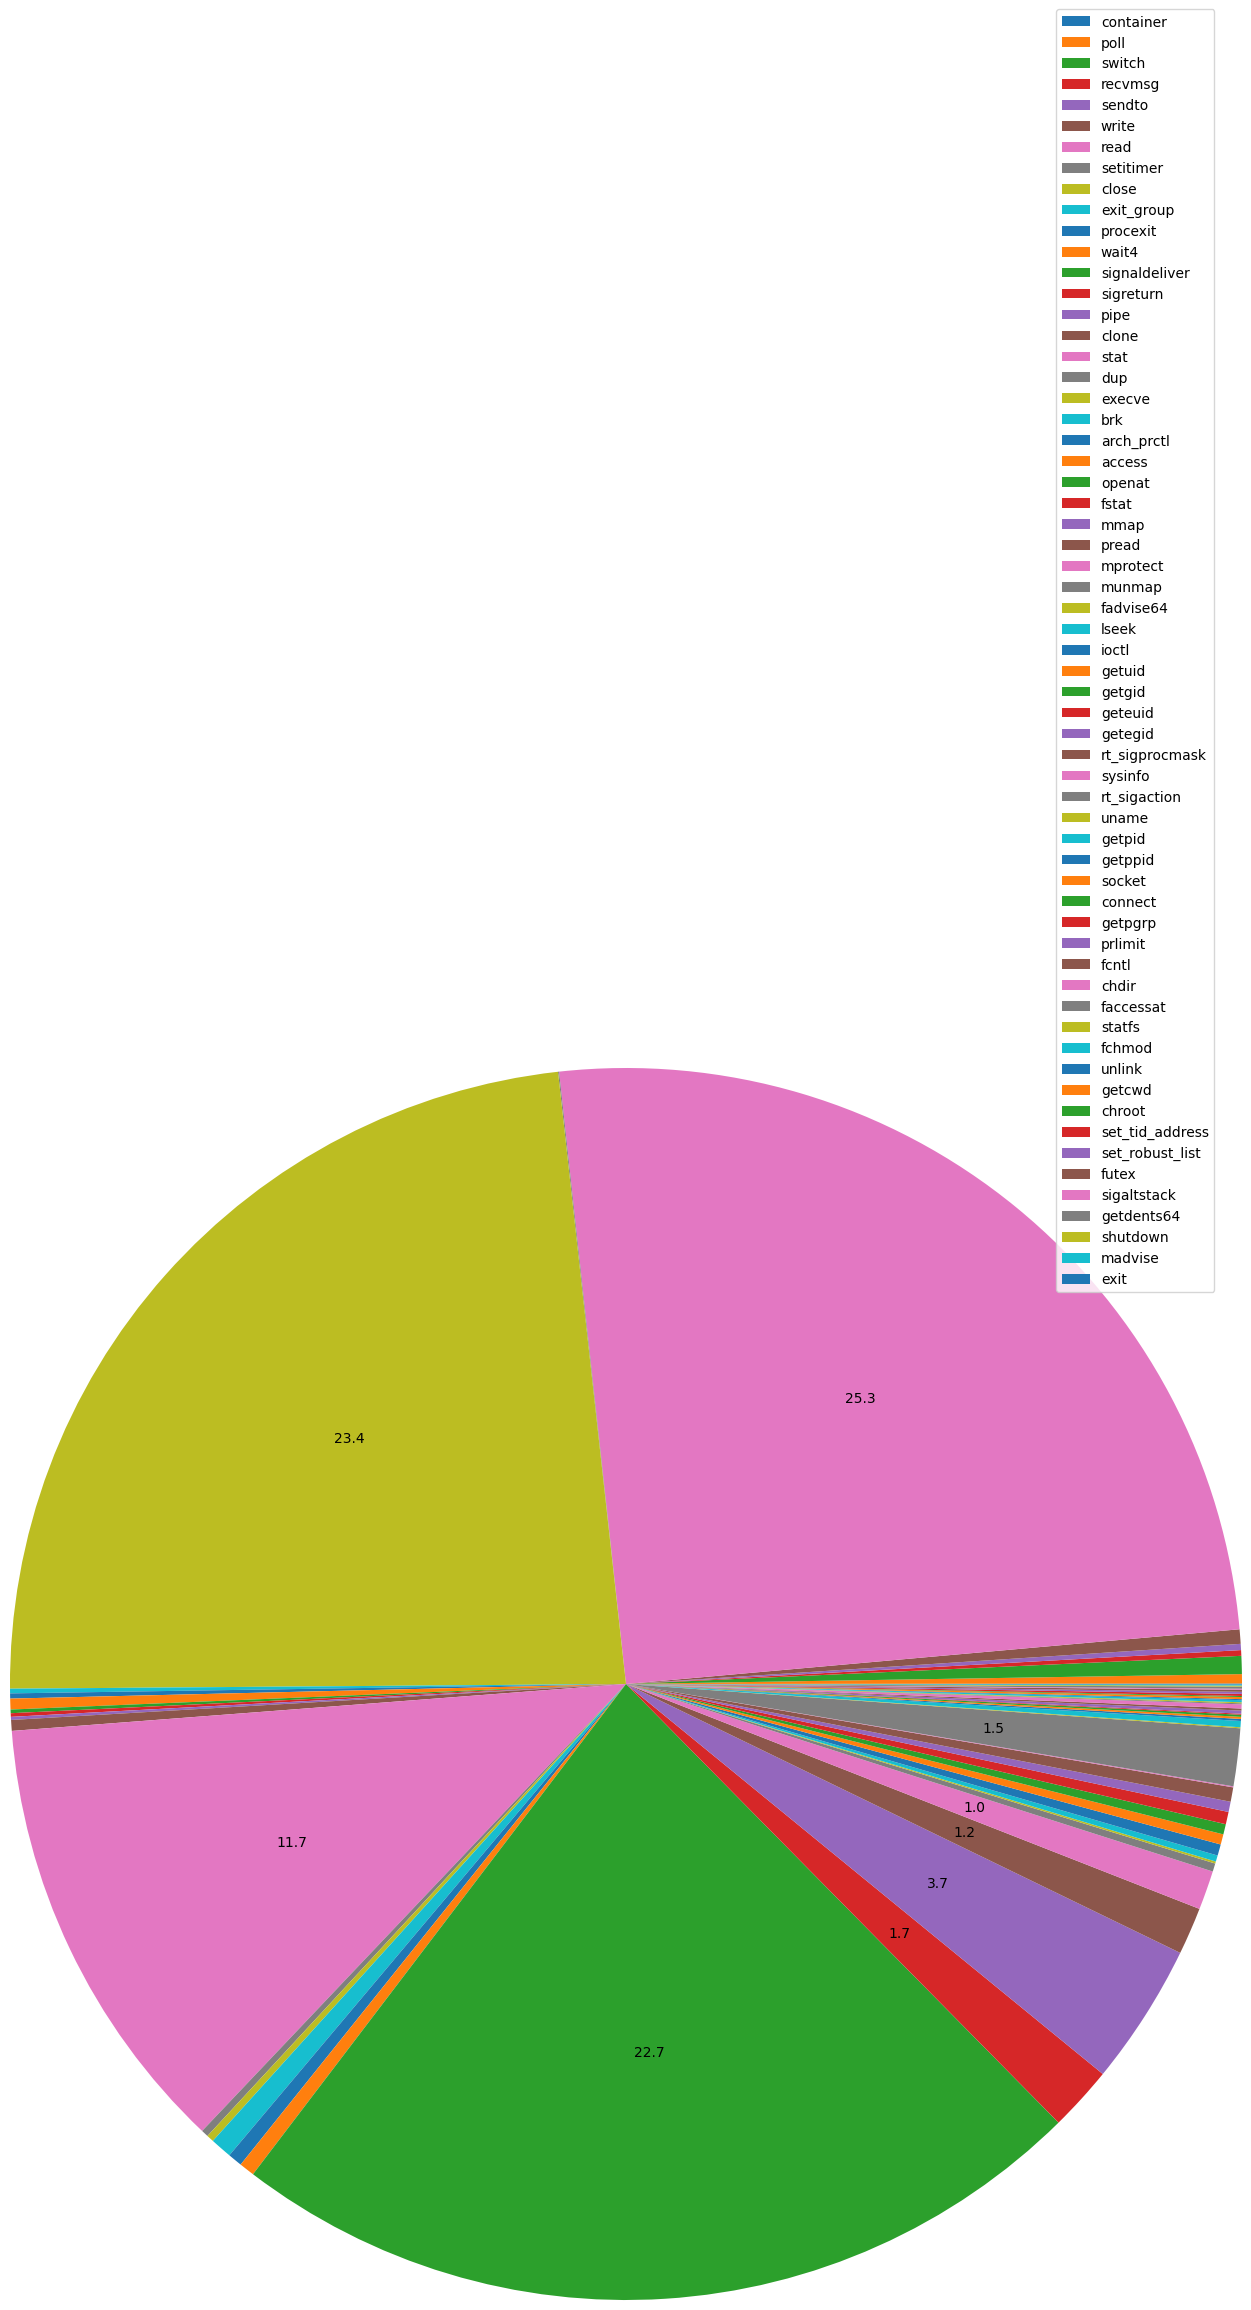

In [26]:
getPlot('mounted_socket')